# <center>  DATA QUALITY ASSESSMENT AND PROCESSING

## DATA PREPARATION
There are various tools for preparing data for analysis. Here I make use of `pandas and numpy` libraries in python 

In [1]:
#read in needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

**DATA INFORMATION TABLES**

Data is mostly presented in tables. It is important to know the information carried in every level of the data for correct evaluations and interpretation.

*The table below gives a description of the various variables in the dataset.** [[1]](#ref1)

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percent of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percent of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|


The first step towards learning any dataset is to read it and get a summarised overview of how the data looks like. Things to look out for are; few examples of the observations, total variables and observations under enquiry and generally what data types are present.



### STEP 1 : LOADING AND EXPLORING

#### Reading and Inspecting 

In [2]:
#reading in the data
Life_Expectancy=pd.read_csv("led.csv")

#a peak of the data
Life_Expectancy.head(4)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8


In [3]:
#last data observations
Life_Expectancy.tail(2)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [4]:
Life_Expectancy.shape

(2938, 22)

In [5]:
#INSPECTING COLUMN NAMES
Life_Expectancy.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

#### Summary Statistics

**Missing Values and Data types inspection**

In [6]:
Life_Expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [7]:
def missing_values(data):
    """Function that checks for null values and computes the percentage of null values
    Args:
        data: loaded dataframe
    Return:
        dataframe: dataframe of total null values with corresponding percentages
    """
    total = data.isnull().sum().sort_values(ascending=False)   # create an empty datafram
    percentage = round((total / data.shape[0]) * 100, 2)
    
    return pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])


missing_values(Life_Expectancy)

,Total,Percentage
Population,652,22.19
HepatitisB,553,18.82
GDP,448,15.25
Totalexpenditure,226,7.69
Alcohol,194,6.60
Incomecompositionofresources,167,5.68
Schooling,163,5.55
thinness5-9years,34,1.16
thinness1-19years,34,1.16
BMI,34,1.16


**INSPECTING ANOMALIES**

Here, there is the need to get summary statistics of the numerical variable to get an idea of how the data is distributed in order to make decisions on the next steps in the data cleaning process.

In [8]:
Life_Expectancy.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


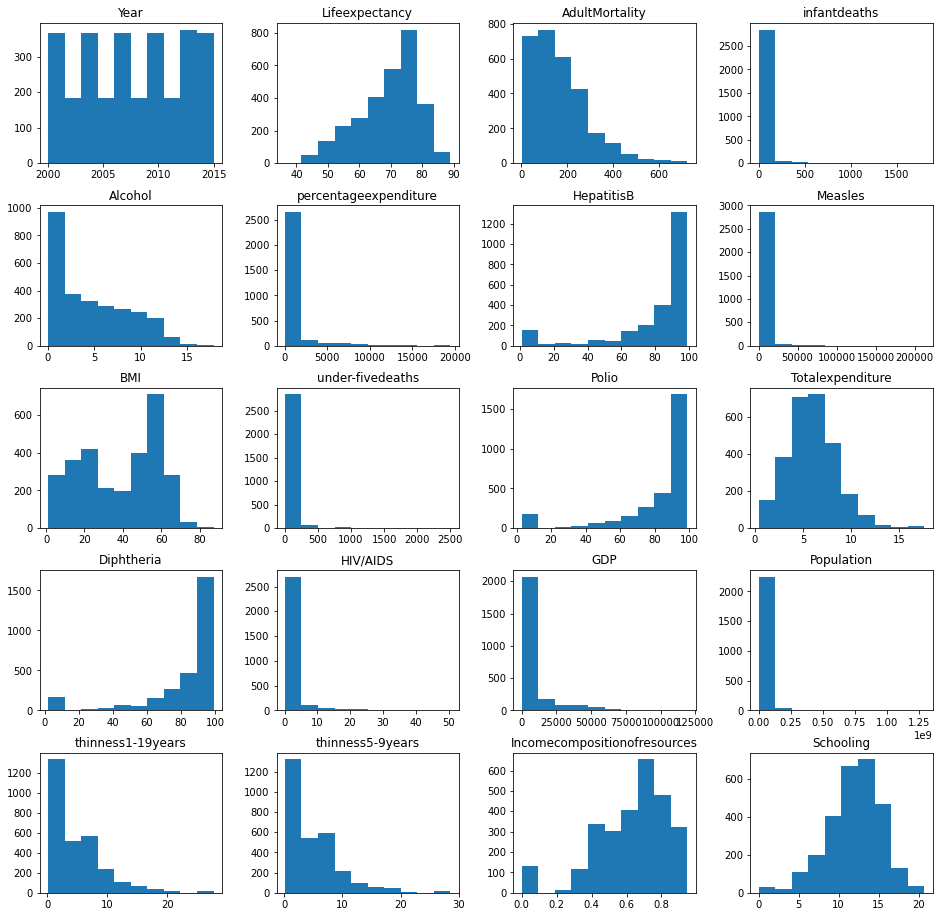

In [9]:
histograms= Life_Expectancy.hist(figsize=(16,16), grid=False)

In [10]:
df1=Life_Expectancy.select_dtypes(exclude=['object'])

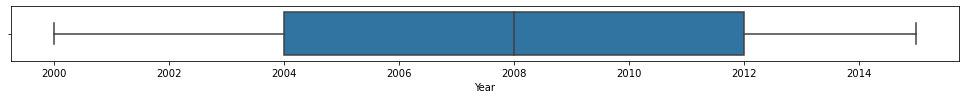

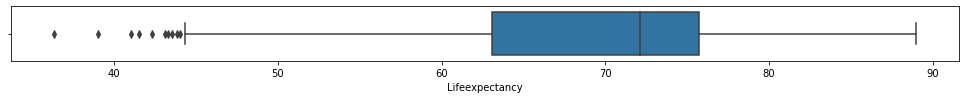

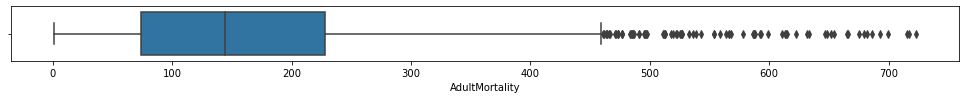

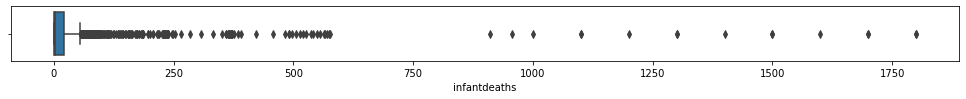

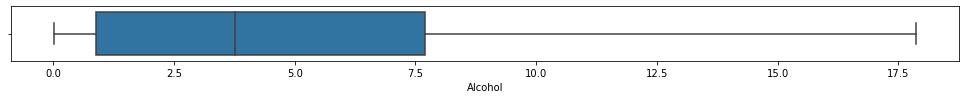

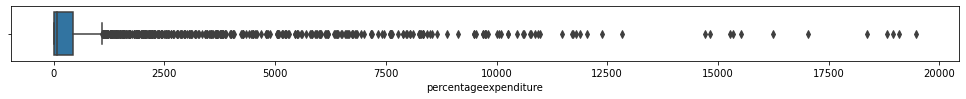

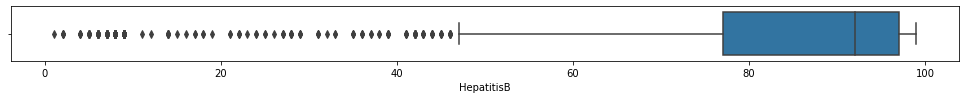

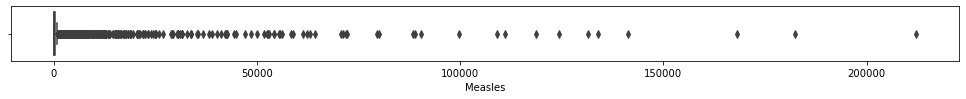

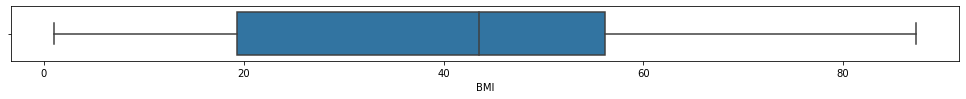

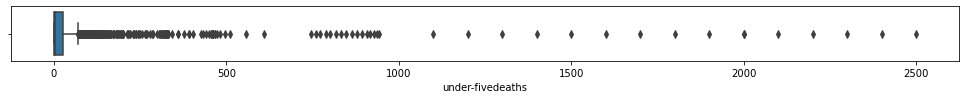

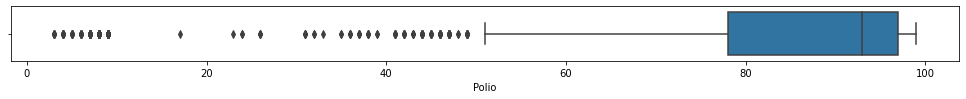

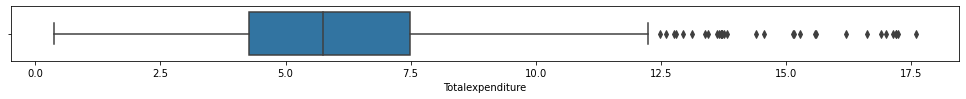

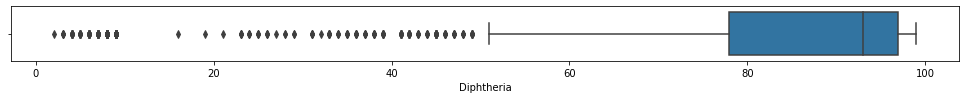

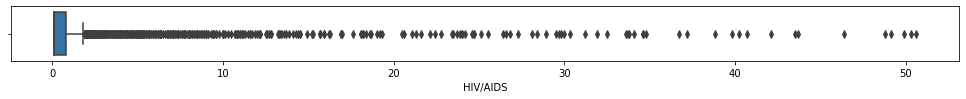

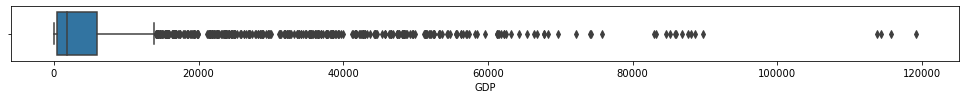

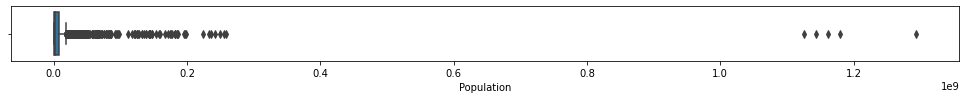

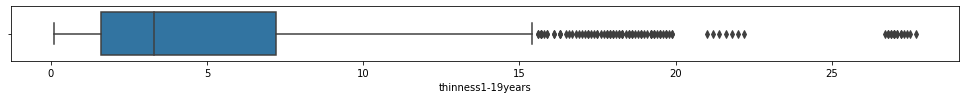

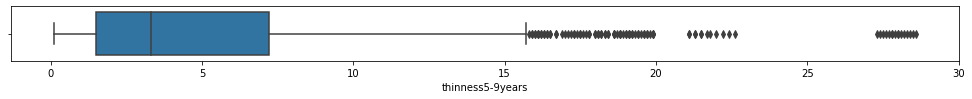

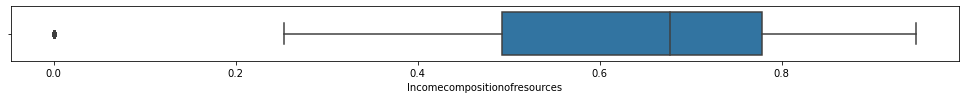

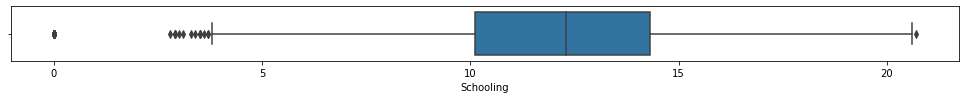

In [11]:
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [12]:
duplicateRows = Life_Expectancy[Life_Expectancy.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [Country, Year, Status, Lifeexpectancy, AdultMortality, infantdeaths, Alcohol, percentageexpenditure, HepatitisB, Measles, BMI, under-fivedeaths, Polio, Totalexpenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness1-19years, thinness5-9years, Incomecompositionofresources, Schooling]
Index: []

[0 rows x 22 columns]


**SUMMARY OF CATEGORICAL VARIABLES**

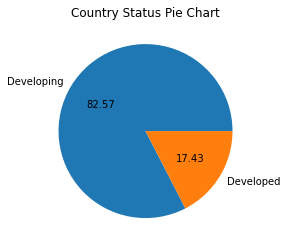

In [13]:
Life_Expectancy.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Country Status Pie Chart')
plt.ylabel('')
plt.show()

In [14]:
pd.set_option("display.max_rows", None)
print(Life_Expectancy["Country"].value_counts())

Afghanistan                                      16
Peru                                             16
Nicaragua                                        16
Niger                                            16
Nigeria                                          16
Norway                                           16
Oman                                             16
Pakistan                                         16
Panama                                           16
PapuaNewGuinea                                   16
Paraguay                                         16
Philippines                                      16
Lebanon                                          16
Poland                                           16
Portugal                                         16
Qatar                                            16
RepublicofKorea                                  16
RepublicofMoldova                                16
Romania                                          16
RussianFeder

#### Observations
From the information above, the data contains `2938 rows/observations` and `22 columns/variables`. The first observation is from Afghanistan and the last from Zimbabwe. The data has a combination of `Numerical and Categorical` data. 

`There are also some missing data` we need to investigate and treat. These can be found in the columns; Population, HepatitisB, GDP, Totalexpenditure, Alcohol, Incomecompositionofresources, Schooling, thinness5-9years, BMI, Polio,
Diphtheria, Lifeexpectancy and AdultMortality

`The columns with outliers are;` 'Lifeexpectancy', 'AdultMortality','infantdeaths', 'percentageexpenditure', 'HepatitisB','Measles', 'under-fivedeaths', 'Polio', 'Totalexpenditure','Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling'. This can be observed from the `box plots` and also the `standard deviations` in the summarry statistics.

Thankfully, there are `no duplicates` in the data

In terms of correlation, `Adult Mortality and HIV/AIDS` have a strong `negative` relationship with life expectancy while BMI, `Income composition of resources and schooling` have a strong positive relationship with life expectancy.

The data is composed of 82.57 developing countries and 17.43 developing countries.


### STEP 2: DATA CLEANING

#### Dealing with Missing Values

Interpolation is a mathematical method that adjusts a function to your data and uses this function to extrapolate the missing data. The most simple type of interpolation is the linear interpolation, that makes a mean between the values before the missing data and the value after. [[2]](#ref2)

Linear Interpolation simply means to estimate a missing value by connecting dots in a straight line in increasing order. In short, It estimates the unknown value in the same increasing order from previous values. Interpolation in most cases supposed to be the best technique to fill missing values. [[3]](#ref3)

I find this method more plausible for the data because the treated observations will be more likely closer to a typical one for the country in question.

In [15]:
Life_Expectancy1 = Life_Expectancy.interpolate(method = 'linear', limit_direction = 'forward')

In [16]:
Life_Expectancy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2938 non-null   float64
 4   AdultMortality                2938 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2938 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2938 non-null   float64
 13  Tot

`From the above given information, it is clear that we no longer have missing values in our data.`

#### Dealing with Outliers

`WINSORIZATION`

To winsorize data means to set extreme outliers equal to a specified percentile of the data. Winsorization is a method that initially replaces the smallest and largest values with the observations closest to them. [[4]](#ref4) The nature of the data makes this a more plausible approach to the data. To do this, I will make use of the information from the boxplot to locate where outliers occur and then I will find out the percentage of outliers in each variable to target the process.

In [17]:
def outlier_count(col, data=Life_Expectancy1):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [18]:
cont_vars = list(Life_Expectancy1.columns)[3:]
for col in cont_vars:
    outlier_count(col)

---------------Lifeexpectancy---------------
Number of outliers: 12
Percent of data that is outlier: 0.41%
---------------AdultMortality---------------
Number of outliers: 82
Percent of data that is outlier: 2.79%
---------------infantdeaths---------------
Number of outliers: 315
Percent of data that is outlier: 10.72%
---------------Alcohol---------------
Number of outliers: 1
Percent of data that is outlier: 0.03%
---------------percentageexpenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------HepatitisB---------------
Number of outliers: 248
Percent of data that is outlier: 8.44%
---------------Measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under-fivedeaths---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------Polio---------------
Number of outlier

In [19]:
Life_Expectancy1['Lifeexpectancy'] = winsorize(Life_Expectancy1['Lifeexpectancy'] , limits=[0.01, 0])
Life_Expectancy1['AdultMortality'] = winsorize(Life_Expectancy1['AdultMortality'] , limits=[0, 0.03])
Life_Expectancy1['infantdeaths'] = winsorize(Life_Expectancy1['infantdeaths'] , limits=[0, 0.11])
Life_Expectancy1['Alcohol'] = winsorize(Life_Expectancy1['Alcohol'] , limits=[0, 0.003])
Life_Expectancy1['percentageexpenditure'] = winsorize(Life_Expectancy1['percentageexpenditure'] , limits=[0, 0.2])
Life_Expectancy1['HepatitisB'] = winsorize(Life_Expectancy1['HepatitisB'] , limits=[0.09, 0])
Life_Expectancy1['Measles'] = winsorize(Life_Expectancy1['Measles'] , limits=[0, 0.2])
Life_Expectancy1['under-fivedeaths'] = winsorize(Life_Expectancy1['under-fivedeaths'] , limits=[0, 0.14])
Life_Expectancy1['Polio'] = winsorize(Life_Expectancy1['Polio'] , limits=[0.1, 0])
Life_Expectancy1['Totalexpenditure'] = winsorize(Life_Expectancy1['Totalexpenditure'] , limits=[0, 0.012])
Life_Expectancy1['Diphtheria'] = winsorize(Life_Expectancy1['Diphtheria'] , limits=[0.103, 0])
Life_Expectancy1['HIV/AIDS'] = winsorize(Life_Expectancy1['HIV/AIDS'] , limits=[0, 0.2])
Life_Expectancy1['GDP'] = winsorize(Life_Expectancy1['GDP'] , limits=[0, 0.12])
Life_Expectancy1['Population'] = winsorize(Life_Expectancy1['Population'] , limits=[0, 0.13])
Life_Expectancy1['thinness1-19years'] = winsorize(Life_Expectancy1['thinness1-19years'] , limits=[0, 0.031])
Life_Expectancy1['thinness5-9years'] = winsorize(Life_Expectancy1['thinness5-9years'] , limits=[0, 0.034])
Life_Expectancy1['Incomecompositionofresources'] = winsorize(Life_Expectancy1['Incomecompositionofresources'] , limits=[0.0443, 0])
Life_Expectancy1['Schooling'] = winsorize(Life_Expectancy1['Schooling'] , limits=[0.018, 0.008])

In [20]:
df2=Life_Expectancy1.select_dtypes(exclude=['object'])

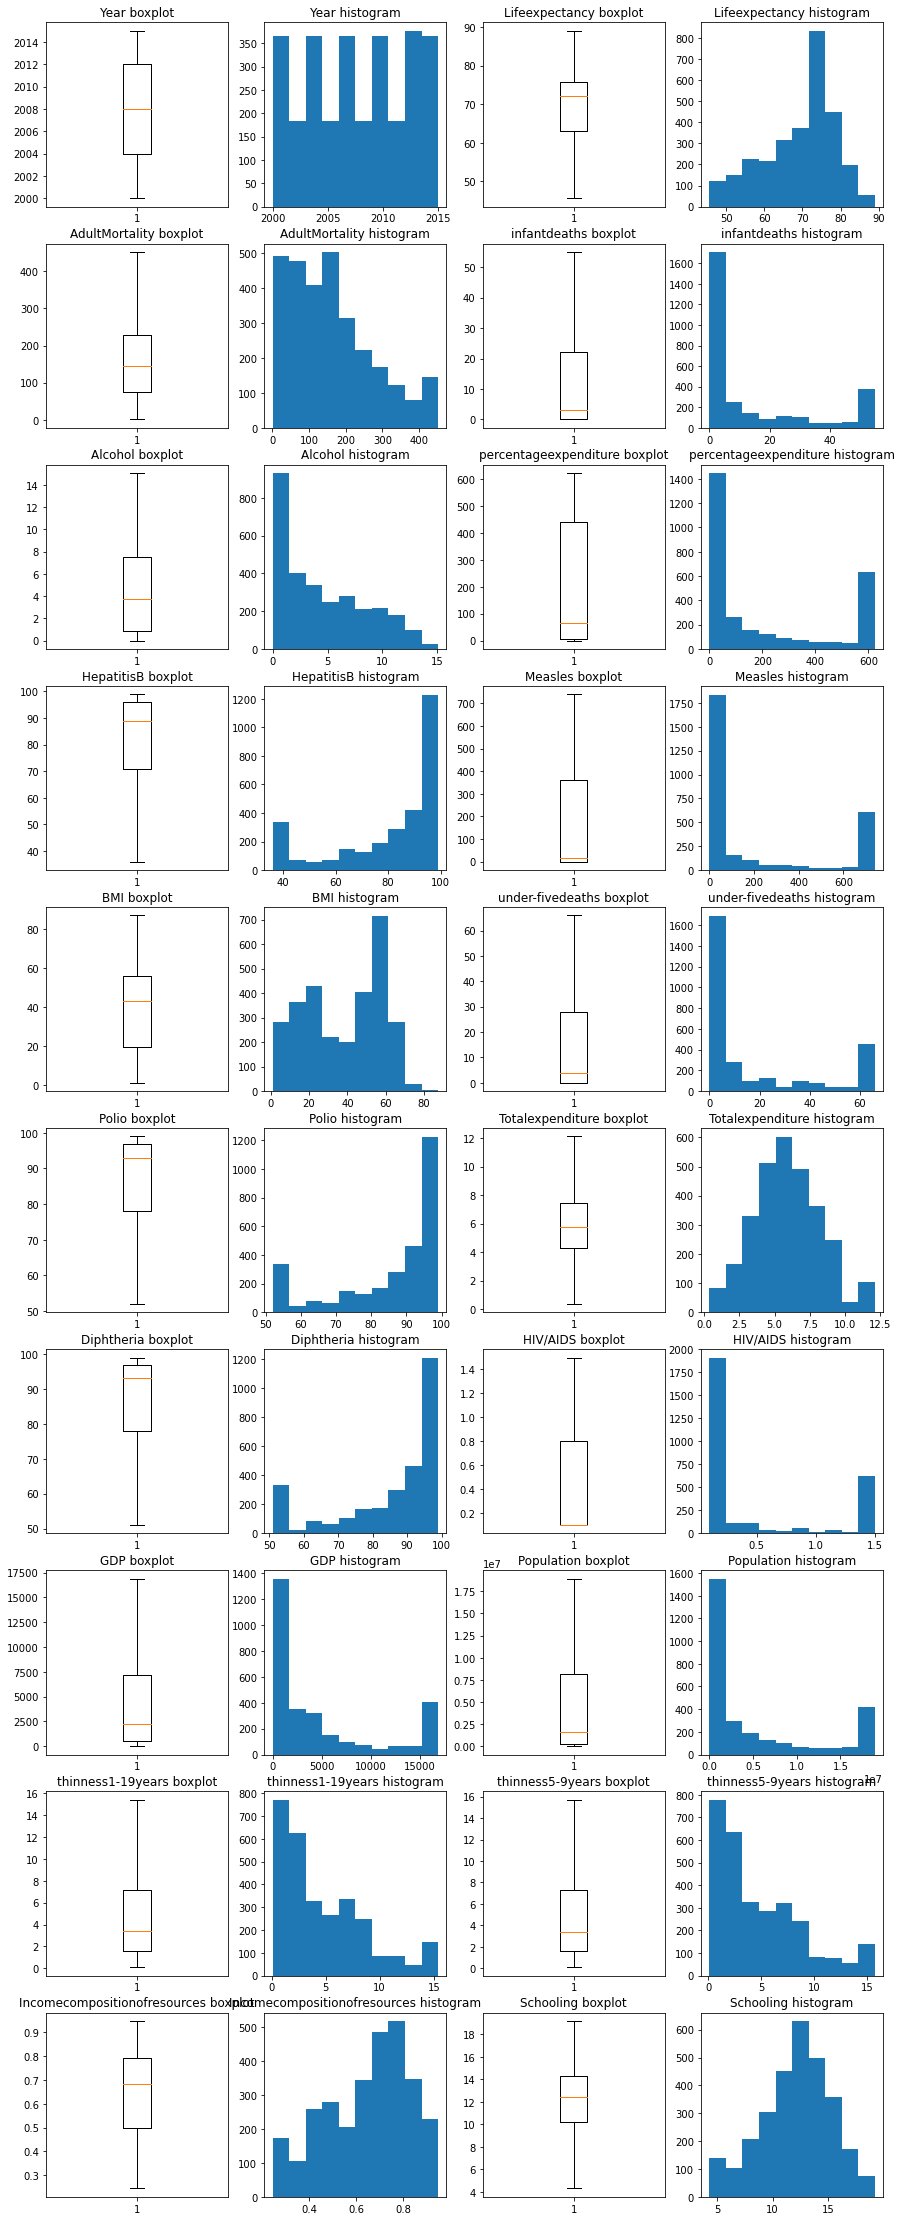

In [21]:
cont_vars = list(df2.columns)[:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(10, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(10, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df2)

At this stage, the data cleaning process has come to a successful end. 
The data can now be used for `explanatory and predictive analysis.`

#### Dealing With Categorical Data

In [22]:
#categories in the country column with only one representation
anol=Life_Expectancy1.loc[(Life_Expectancy.Country.isin(['Tuvalu',
                          'CookIslands',
                          'MarshallIslands',
                          'Monaco',
                          'Palau',
                          'Niue',
                          'SanMarino',
                          'Nauru',
                          'SaintKittsandNevis',"Dominica"]))]

anol

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
624,CookIslands,2013,Developing,66.25,255.5,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,1103.556626,4.908801e+05,0.10,0.10,0.6310,12.00
769,Dominica,2013,Developing,65.65,238.5,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,1.122989e+06,2.70,2.60,0.7210,12.70
1650,MarshallIslands,2013,Developing,70.30,16.5,0,0.01,623.910050,36.0,0,...,79.0,12.11,79.0,0.1,3617.752354,2.093164e+06,0.10,0.10,0.6460,4.30
1715,Monaco,2013,Developing,67.90,203.5,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,3762.447079,3.462588e+06,1.25,1.30,0.3665,7.40
1812,Nauru,2013,Developing,63.30,103.0,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,1.527777e+07,0.10,0.10,0.5570,9.60
1909,Niue,2013,Developing,64.45,52.0,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,3917.182933,8.711980e+05,0.10,0.10,0.4740,12.65
1958,Palau,2013,Developing,70.30,68.5,0,2.26,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,2.920000e+02,0.10,0.10,0.7790,14.20
2167,SaintKittsandNevis,2013,Developing,61.75,282.0,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,331.854826,8.584318e+04,3.70,3.60,0.7490,13.40
2216,SanMarino,2013,Developing,69.75,18.5,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,889.664430,1.065070e+05,2.85,2.75,0.6025,15.10
2713,Tuvalu,2013,Developing,63.05,257.5,0,0.01,78.281203,36.0,0,...,52.0,12.11,51.0,0.1,3542.135890,1.819000e+03,0.20,0.10,0.2440,4.30


In [23]:
Life_Expectancy1.drop([624, 769,1650,1715, 1812, 1909, 1958,2167, 2216, 2713], axis=0, inplace=True)

In [24]:
pd.set_option("display.max_rows", None)
print(Life_Expectancy1["Country"].value_counts().tail(9))

Gabon        16
Gambia       16
Georgia      16
Germany      16
Ghana        16
Greece       16
Grenada      16
Guatemala    16
Zimbabwe     16
Name: Country, dtype: int64


In [25]:
Life_Expectancy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2928 non-null   object 
 1   Year                          2928 non-null   int64  
 2   Status                        2928 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2928 non-null   int64  
 6   Alcohol                       2928 non-null   float64
 7   percentageexpenditure         2928 non-null   float64
 8   HepatitisB                    2928 non-null   float64
 9   Measles                       2928 non-null   int64  
 10  BMI                           2928 non-null   float64
 11  under-fivedeaths              2928 non-null   int64  
 12  Polio                         2928 non-null   float64
 13  Tot

In [26]:
filename='led_clean.xlsx'
Life_Expectancy1.to_excel(filename)

## REFERENCES

`1`
[Ziring, Steve. "Markdown table for descriptions". Kaggle, 2020, https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/discussion/161876. Accessed 07 June 2022.]<a id='ref1'></a>



`2`
[Portell, Aleticia. "What to do when data is missing?". leportella.com, 19 Jan. 2019, https://leportella.com/missing-data/. Accessed 07 June 2022.]<a id='ref2'></a>


`3`
[Raghav, Agrawal. "Interpolation – Power of Interpolation in Python to fill Missing Values". Data Science Blogathon, 1 June. 2021,https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/. Accessed 07 June 2022.]<a id='ref3'></a>

`4`
[Zach. "How to Winsorize Data: Definition & Examples". statology.org/, 1 June. 2021,https://www.statology.org/winsorize/. Accessed 09 June 2022.]<a id='ref3'></a>
